In [327]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [328]:
G=4*np.pi**2
epsilon=0.1
masa=0.01
v_0=0
tmin,tmax=0.,2.
dt=0.001
t = np.arange(0,tmax+dt,dt)


In [492]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = 0.001
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.f = np.array([0.,0.,0.])
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        self.kVector= np.zeros(len(t))
        self.epVector = np.zeros( len(t) )
        self.pVector = np.zeros( (len(t),len(r0)) )
        self.lVector = np.zeros( (len(t),len(r0)) )
        self.l = np.cross(masa*self.r, self.v)
        self.p=masa*self.v
        self.Ep=0
        self.k=0.5*masa*np.linalg.norm(self.v)**2
        self.m = masa
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.a=self.f/masa
        self.epVector[i]=self.Ep
        self.kVector[i]=self.k
        self.pVector[i]=self.p
        self.lVector[i]=self.l
        
        if i==0:
            self.r += self.dt * self.v
        else:
            self.r = (2*self.r)-self.rVector[i-1]+(self.a*(self.dt**2))
            self.v = (self.r-self.rVector[i-1])/(2*self.dt)
        self.f = np.array([0.,0.,0.]) 
        self.Ep=0
        self.k=0.5*masa*np.linalg.norm(self.v)**2
        self.l = np.cross(masa*self.r, self.v)
        
    def CheckForce(self, particles):
        for i in range(len(particles)):
            
            if self.Id != i:
                distance=np.linalg.norm(self.r-particles[i].GetPosition())
                Fn=(-G*(masa**2))
                Fn=Fn/((distance**2+epsilon**2)**(1.5))
                self.f=np.add(self.f,Fn*(self.r-particles[i].GetPosition()))
                self.Ep+=(masa**2)/((distance**2+epsilon**2)**(0.5))
    

    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    def GetPosition(self):
        return self.r
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
               # print(self.RrVector)

In [493]:
def GetParticles(NParticles,radio,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        r=np.random.uniform( 0, radio, size=1 )
        angle=np.random.uniform( 0, 2*np.pi, size=1 )
        angle2=np.random.uniform( -np.pi, np.pi, size=1 )
        x0 = np.array([r[0]*np.cos(angle[0]),r[0]*np.sin(angle[0]),r[0]*np.sin(angle2[0])])
        v0 = np.array([Velo,Velo,Velo])
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,masa,i)
        
        Particles_.append(p)
        
    return Particles_

In [494]:
def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,1.0,Velo = 0,dt=dt)
    energiatotal=np.zeros(len(t))
    energiap=np.zeros(len(t))
    energiak=np.zeros(len(t))
    p1=np.zeros(len(t))
    p2=np.zeros(len(t))
    p3=np.zeros(len(t))
    l=np.zeros(len(t))
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckForce(Particles)
            Particles[i].Evolution(it)
            energiap[it]+=Particles[i].epVector[it]
            energiak[it]+=Particles[i].kVector[it]
            p1[it]+=Particles[i].pVector[it][0]
            p2[it]+=Particles[i].pVector[it][1]
            p3[it]+=Particles[i].pVector[it][2]
            l[it]+=np.linalg.norm(Particles[i].lVector[it])
    energiatotal=energiak-0.5*G*energiap   
    return Particles,energiatotal,-energiap*0.5*G,energiak,p1,p2,p3,l

In [495]:
Particles,energia,energiap,energiak,p1,p2,p3,l = RunSimulation(t,100,Velo=0)


100%|██████████| 2001/2001 [00:02<00:00, 968.93it/s]


<IPython.core.display.Javascript object>


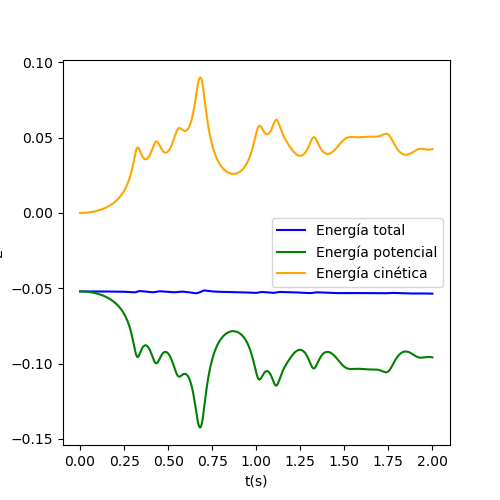

In [496]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
plt.plot(t,energia,color="blue",label="Energía total")
plt.plot(t,energiap,color="green",label="Energía potencial")
plt.plot(t,energiak,color="orange",label="Energía cinética")
plt.xlabel("t(s)")
plt.ylabel("E")
plt.legend()
plt.savefig("EnergiaPunto3FaberJoan.png")

<IPython.core.display.Javascript object>


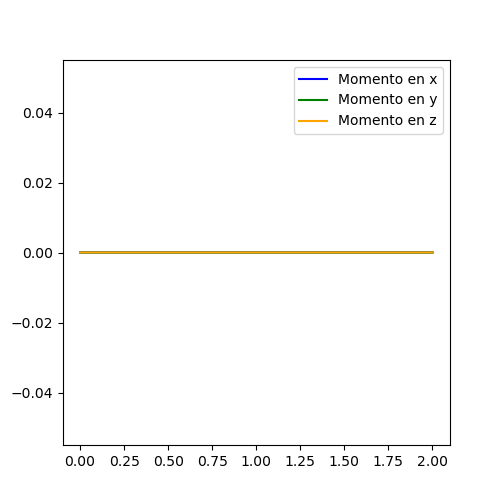

In [497]:
fig = plt.figure(figsize=(5,5))
ax2 = fig.add_subplot(1,1,1)
plt.plot(t,p1,color="blue",label="Momento en x")
plt.plot(t,p2,color="green",label="Momento en y")
plt.plot(t,p3,color="orange",label="Momento en z")
plt.xlabel("t(s)")
plt.legend()
plt.savefig("MomentoPunto3FaberJoan.png")

<IPython.core.display.Javascript object>


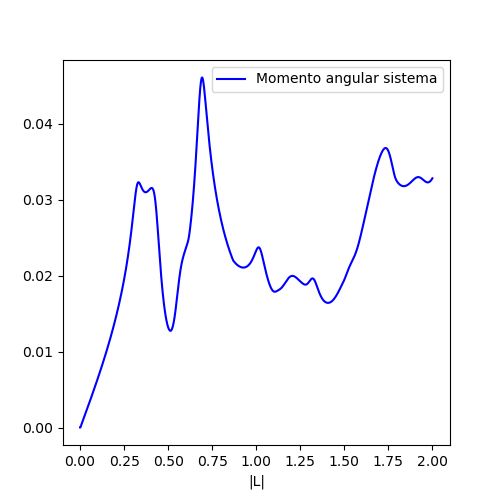

In [498]:
fig = plt.figure(figsize=(5,5))
ax3 = fig.add_subplot(1,1,1)
plt.plot(t,l,color="blue",label="Momento angular sistema")
plt.ylabel("|L|")
plt.xlabel("t(s)")
plt.legend()
plt.savefig("MomentoAngularPunto3FaberJoan.png")

0.00342387911551043


In [353]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


In [354]:
redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

201

<IPython.core.display.Javascript object>


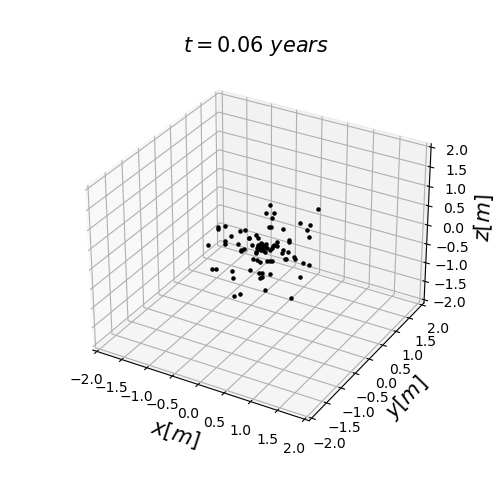

In [355]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection = '3d')


def init():
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-2,2)
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        vz = p.GetVelocityVector()[i,2]
        plot = ax.scatter(x,y,z,marker='.',color="black")
        
        #plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [338]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('NBodyproblem.mp4', writer=writer_)